#AIML CA1 - Part B. Housing Data

By: Koh Hui Lyn (p2021672)
(open in colab!! got headers for easy viewing!!! :) )

For this dataset, I want to predict the Prices of houses based on the dataset's features.

In [1]:
#importing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset

#(drive)
#df = pd.read_csv("/content/drive/MyDrive/datasets/kc_house_data.csv")
#not drive
df = pd.read_csv("kc_house_data.csv")
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


##Data Preprocessing

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Removing ID as I don't need it,

Removing sqft_living etc as they are correlated to sqft_lot

Removing sqft_living15 as it is correlated to sqft_lot15 

In [7]:
df = df.drop(['id', 'sqft_living', 'sqft_above', 'sqft_basement','sqft_living15'], axis=1)

###Data Preprocessing - Making columns more useful

I changed the date column into a column of Home 
Ages to make it maybe more useful.
I also added a column to show if the house has or has not been renovated before.

In [8]:
#Converting Date to datetime type
df['date'] = pd.to_datetime(df['date'])

#Adding a Age column for house by taking Date sold - Yr built
df["age"] = df["date"].dt.year - df['yr_built']

#Also adding a Renovated - 1 or 0 column, if never Reno, 0, if have Reno 1.
df['renovated'] = df['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

#Dropping the old columns
df = df.drop(['date','yr_renovated','yr_built'], axis=1)
df.head(3)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_lot15,age,renovated
0,221900.0,3,1.00,5650,1.0,0,0,3,7,98178,47.5112,-122.257,5650,59,0
1,538000.0,3,2.25,7242,2.0,0,0,3,7,98125,47.7210,-122.319,7639,63,1
2,180000.0,2,1.00,10000,1.0,0,0,3,6,98028,47.7379,-122.233,8062,82,0


###Data Preprocessing -  Removing weird values

Before I deskew df, I want to check the values of some features.

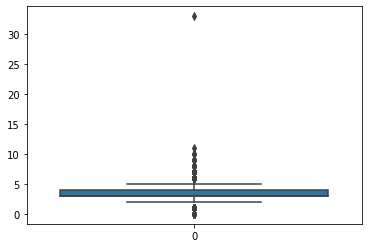

In [9]:
#Checking values in bedrooms before removal
sns.boxplot(data=df['bedrooms'])

In [10]:
#Retaining reasonable values in bedrooms ie bedrooms < 9 and > 0
df['bedrooms'] = df['bedrooms'][(df["bedrooms"] < 9) & (df["bedrooms"] > 0)]

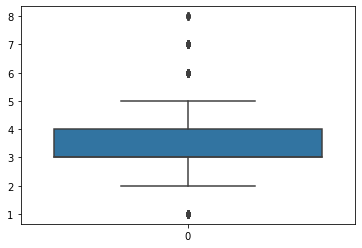

In [11]:
#Checking values in bedrooms after removal
sns.boxplot(data=df['bedrooms'])

I did the same for bathrooms

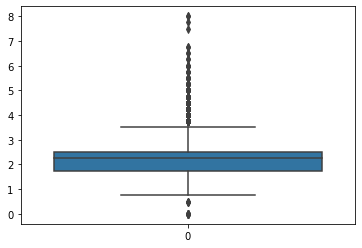

In [12]:
#Looking at values in bathroom before removal
sns.boxplot(data=df['bathrooms'])

In [13]:
#Retaining reasonable values in bathrooms ie bathrooms > 0
df['bathrooms'] = df['bathrooms'][(df["bathrooms"] > 0)]

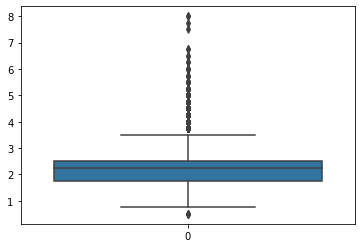

In [14]:
#Looking at values in bathroom after removal
sns.boxplot(data=df['bathrooms'])

Floors column looks ok, so I didn't change it.

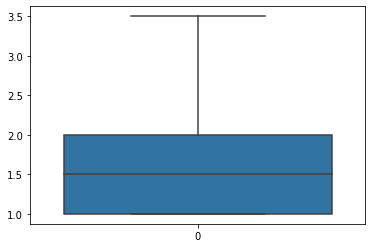

In [15]:
#Looking at values in floors before removal
sns.boxplot(data=df['floors'])

###Data Preprocessing - Looking for relationships

For 1-3 bedrooms, the overlap between each boxplot is more than the overlap between each of them and 4 bedrooms. We can say that generally 4 bedroom houses are more expensive. The plot also shows that the price will generally increase as the number of bedrooms goes up.

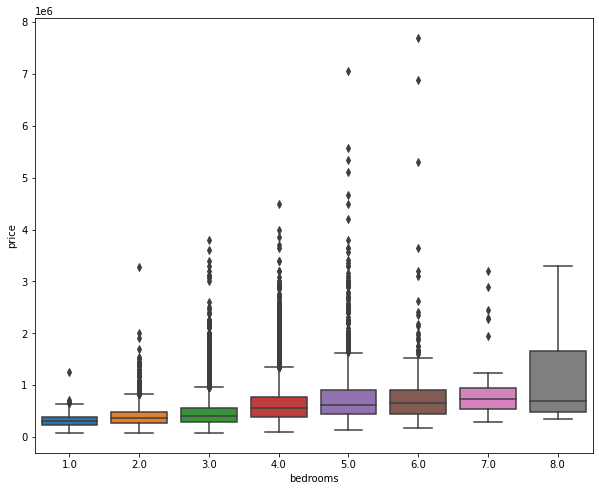

In [16]:
#Can see that as no. bedrooms go up, price also goes up.
plt.figure(figsize=(10,8))
sns.boxplot(x=df['bedrooms'], y=df['price'])

For the first few, we can see that the boxplots are mostly overlapping, but the price is increasing. Thus we can say that generally as the number of bathroom increases, the price will also increase.

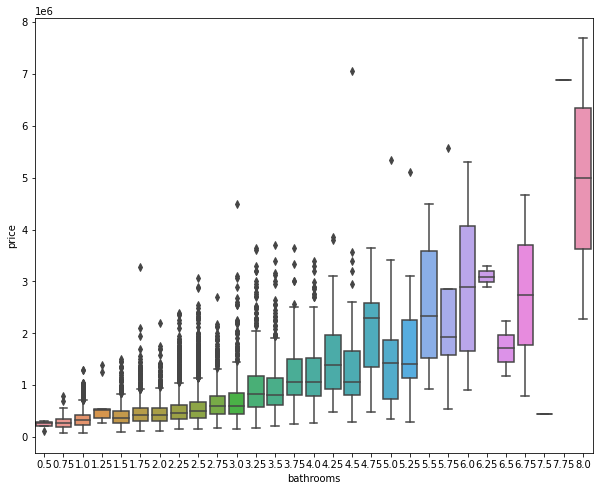

In [17]:
#Boxplot of bathrooms and price
plt.figure(figsize=(10,8))
sns.boxplot(x=df['bathrooms'], y=df['price'])

There is a relationship between grade and price. As the overlap between the boxplots grows less and less, the price increases more and more. Thus, we can say that the higher the grade, the higher the price of the house.

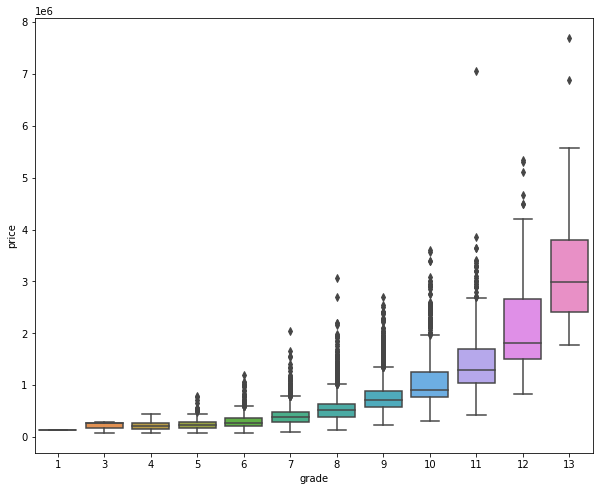

In [18]:
#Boxplot of grade and price.
plt.figure(figsize=(10,8))
sns.boxplot(x=df['grade'], y=df['price'])

Boxplots are generally overlapping, showing that there generally isn't a difference in price for homes with different number of floors. We also can't say that there is a strong relationship between price and floors as well as 2.5 seems to be the most costly out of all of them. 

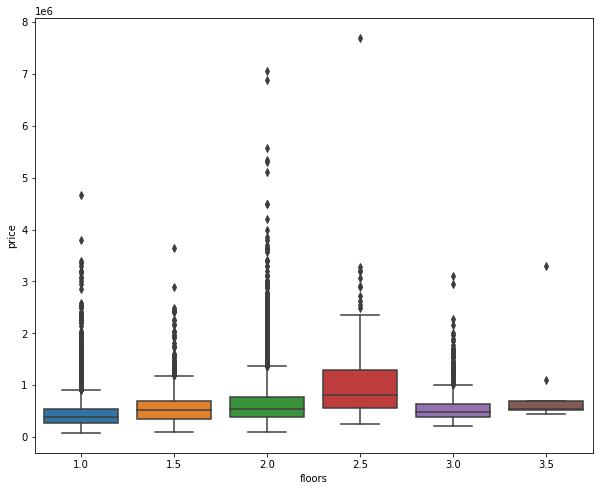

In [19]:
#Boxplot between floor and price
plt.figure(figsize=(10,8))
sns.boxplot(x=df['floors'], y=df['price'])

From 0-2, the boxplots overlap more, we can say that there is not much difference in price of houses with 0-2 view. However, prices of houses with 3-4 seem to be generally more than 0-2.

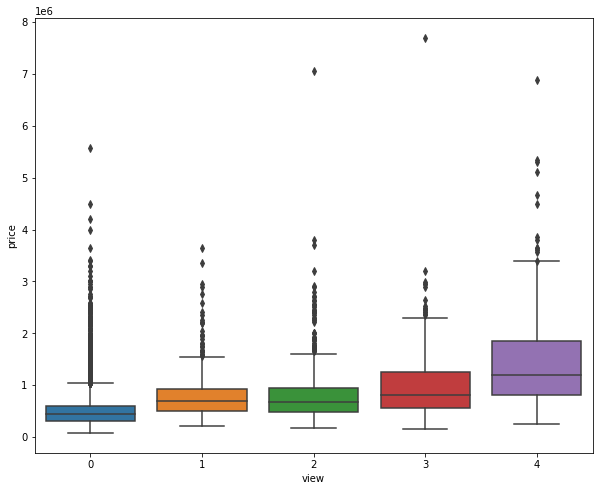

In [20]:
#Boxplot of view & price
plt.figure(figsize=(10,8))
sns.boxplot(x=df['view'], y=df['price'])

Boxplots for 1 & 2 overlap while 3, 4, 5 also overlap with each other.
This means that there isn't much of a difference in price between poorer conditions (1&2) and also between Okay - Better conditions (3-5)

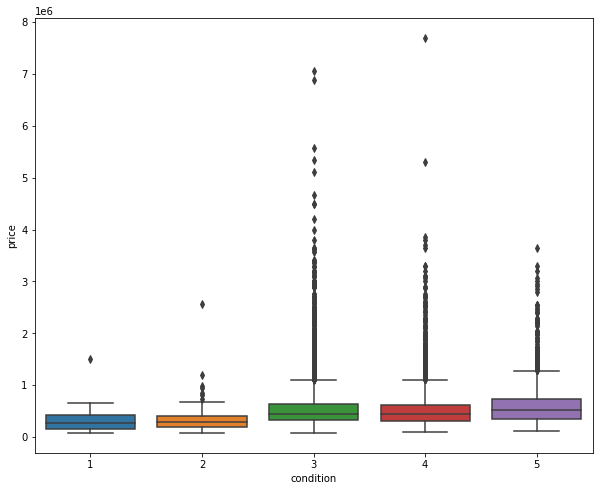

In [21]:
#Boxplot of condition and price
plt.figure(figsize=(10,8))
sns.boxplot(x=df['condition'], y=df['price'])

###Data Preprocessing - Deskewing and removing outliers

In this section I'll deskew the non categorical values.

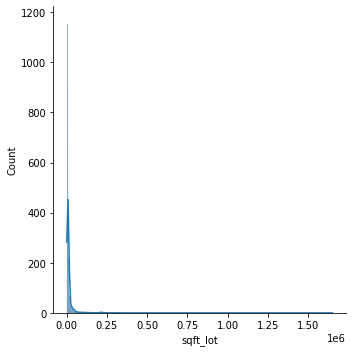

In [22]:
#Checking for skewness in sqft_lot
sns.displot(data=df['sqft_lot'], kde=True)
plt.show()

In [23]:
#Deskewing sqft_lot
df["sqft_lot"] =np.log(df["sqft_lot"])

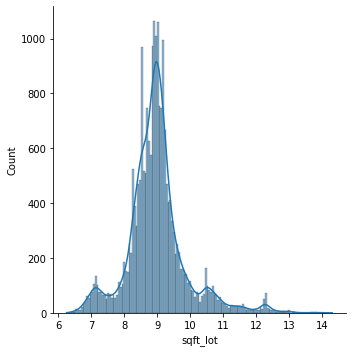

In [24]:
#After deskewing
sns.displot(data=df['sqft_lot'], kde=True)
plt.show()

In [25]:
#Removing outliers from sqft_lot

#Calculating IQR and using IQR to find and remove outliers
Q1 = df['sqft_lot'].quantile(0.25)
Q3 = df['sqft_lot'].quantile(0.75)
IQR = Q3 - Q1
df['sqft_lot'] = df['sqft_lot'][~((df['sqft_lot'] < (Q1 - 1.5 * IQR)) |(df['sqft_lot'] > (Q3 + 1.5 * IQR)))]

After deskewing and removing outliers, sqft_lot became more normal

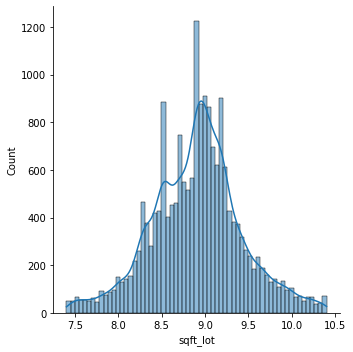

In [26]:
#After removing outliers
sns.displot(data=df['sqft_lot'], kde=True)
plt.show()

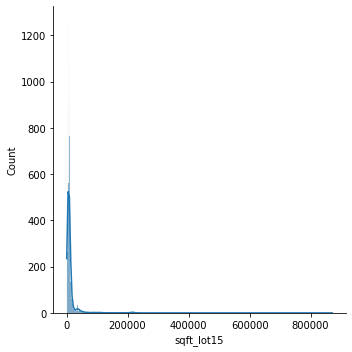

In [27]:
#Checking for skewness in sqft_lot15
sns.displot(data=df['sqft_lot15'], kde=True)
plt.show()

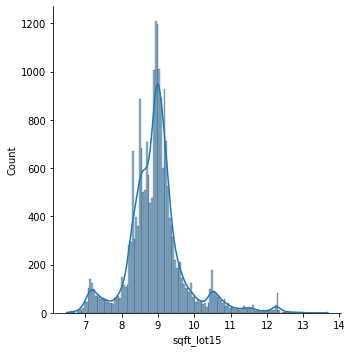

In [28]:
#Deskewing sqft_lotq5
df["sqft_lot15"] =np.log(df["sqft_lot15"])

#After deskewing
sns.displot(data=df['sqft_lot15'], kde=True)
plt.show()

In [29]:
#Removing outliers from sqft_lot15

#Calculating IQR and using IQR to find and remove outliers
Q1 = df['sqft_lot15'].quantile(0.25)
Q3 = df['sqft_lot15'].quantile(0.75)
IQR = Q3 - Q1
df['sqft_lot15'] = df['sqft_lot15'][~((df['sqft_lot15'] < (Q1 - 1.5 * IQR)) |(df['sqft_lot15'] > (Q3 + 1.5 * IQR)))]

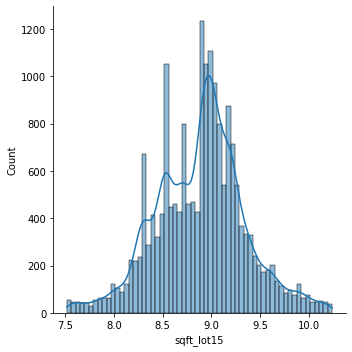

In [30]:
#After removing outliers
sns.displot(data=df['sqft_lot15'], kde=True)
plt.show()

<Figure size 864x576 with 0 Axes>

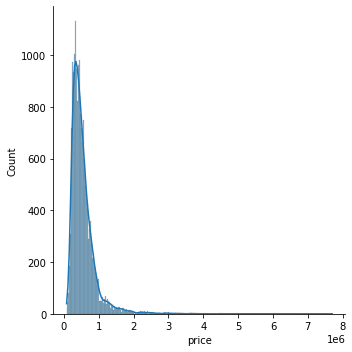

In [31]:
#Checking for skewness in price
plt.figure(figsize=(12,8))
sns.displot(data=df['price'], kde=True)
plt.show()

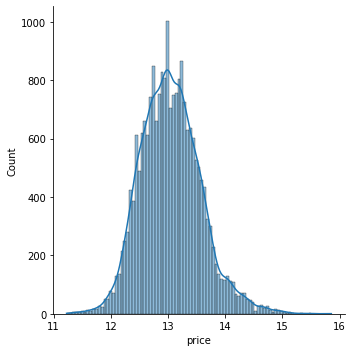

In [32]:
#Deskewing price
df["price"] =np.log(df["price"])

#After deskewing
sns.displot(data=df['price'], kde=True)
plt.show()

In [33]:
#Removing outliers from price

#Calculating IQR and using IQR to find and remove outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df['price'] = df['price'][~((df['price'] < (Q1 - 1.5 * IQR)) |(df['price'] > (Q3 + 1.5 * IQR)))]

<Figure size 864x576 with 0 Axes>

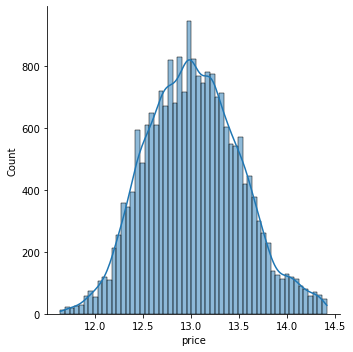

In [34]:
#After removing outliers from price
plt.figure(figsize=(12,8) )
sns.displot(data=df['price'], kde=True)
plt.show()

<Figure size 864x576 with 0 Axes>

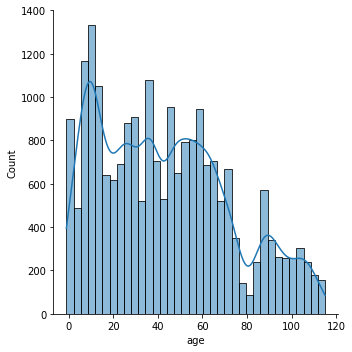

In [35]:
#Checking for skewness in age
plt.figure(figsize=(12,8))
sns.displot(data=df['age'], kde=True)
plt.show()

Ran into an issue with age when trying to display the deskewed plot, and I wanted to find out why. Then I realised that the min value for age is -1, and that's why the log function returned infinity.

In [36]:
df['age'].min()

-1

In [37]:
df['age'].isin(['-1']).sum()

12

I replaced -1 with a reasonable value of 0 because maybe the house was built on the same year as it was sold.

In [38]:
#Replacing -1 with 0
df['age'] = df['age'].replace(-1,0)

In [39]:
df['age'].min()

0

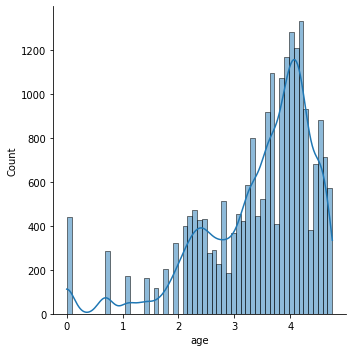

In [40]:
#Deskewing age
df["age"] =np.log1p(df["age"])

#After deskewing
sns.displot(data=df['age'], kde=True)
plt.show()

In [41]:
#Removing outliers from age

#Calculating IQR and using IQR to find and remove outliers
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
df['age'] = df['age'][~((df['age'] < (Q1 - 1.5 * IQR)) |(df['age'] > (Q3 + 1.5 * IQR)))]

<Figure size 864x576 with 0 Axes>

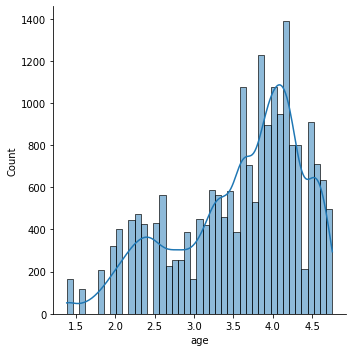

In [42]:
#After removing outliers from age
plt.figure(figsize=(12,8) )
sns.displot(data=df['age'], kde=True)
plt.show()

Since I removed some values, there are some NaNs. We should remove NaNs as they could pose a problem further down the line when implementing models.

In [43]:
df.isnull().sum()

price          333
bedrooms        24
bathrooms       10
sqft_lot      2555
floors           0
waterfront       0
view             0
condition        0
grade            0
zipcode          0
lat              0
long             0
sqft_lot15    2492
age            901
renovated        0
dtype: int64

In [44]:
#Replacing Nan with Mode
df['bedrooms'].fillna(df['bedrooms'].mode()[0], inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mode()[0], inplace=True)

#Replacing Nan with mean
df['sqft_lot'].fillna(df['sqft_lot'].mean(), inplace=True)
df['sqft_lot15'].fillna(df['sqft_lot15'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)

In [45]:
#Looking at corr
idx = df.corr().abs().nlargest(df.shape[1],"price").index
cm = df[idx].corr().abs()
cm['price']

price         1.000000
grade         0.637717
bathrooms     0.490014
lat           0.462802
bedrooms      0.321847
floors        0.299282
view          0.273872
renovated     0.099208
age           0.096346
waterfront    0.075583
long          0.057581
condition     0.031244
zipcode       0.024814
sqft_lot      0.016968
sqft_lot15    0.010596
Name: price, dtype: float64

In [46]:
#Splitting X and y
y = df['price']
#Removing the 5 least corrs
X = df.drop(['price','sqft_lot15','sqft_lot','zipcode','condition', 'long'], axis=1)

###Data preprocessing - Scaling

In [47]:
X.head(3)

,bedrooms,bathrooms,floors,waterfront,view,grade,lat,age,renovated
0,3.0,1.00,1.0,0,0,7,47.5112,4.094345,0
1,3.0,2.25,2.0,0,0,7,47.7210,4.158883,1
2,2.0,1.00,1.0,0,0,6,47.7379,4.418841,0


From the X.head(3), we can see that compared to the rest, the lat is quite big. Thus we have to scale

In [48]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
        test_size=0.2, random_state=2)

In [49]:
from sklearn.preprocessing import StandardScaler
zscaler = StandardScaler()
zscaler.fit(X_train)

X_train_std = zscaler.transform(X_train)
X_test_std = zscaler.transform(X_test)

##K-Nearest Neighbor

I plan to find all the best params for each model, and fine tune them accordingly. After that, I'll pick the best model out of all the fine tuned models.

In [ ]:
#Finding best params for KNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [2,4,6,8,10,20,30], 'algorithm':['auto','ball_tree','kd_tree','brute']}
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid=params, cv=10)
grid.fit(X_train_std, y_train)

#Output GridSearch vals
print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test_std,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test_std, y_test)))


In [56]:
# KNN
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors = 20, algorithm= 'auto')
clf.fit(X_train_std, y_train)

# make predictions
expected = y_test
predicted = clf.predict(X_test_std)
# summarize the fit of the model
vals = {}
vals['MSE (test)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (test)'])
vals['R2 (test)'] = metrics.r2_score(expected, predicted)
print("R2 (test)",vals['R2 (test)'])

# make predictions
expected = y_train
predicted = clf.predict(X_train_std)

# summarize the fit of the model
vals['MSE (train)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (train)'])
vals['R2 (train)'] = metrics.r2_score(expected, predicted)
print("R2 (train)",vals['R2 (train)'])
comparedf = pd.DataFrame(vals,index=["K-Nearest Neighbor"])
comparedf

MSE (means error) 0.062120432530136944
R2 (test) 0.7361374086734476
MSE (means error) 0.055529610639028185
R2 (train) 0.7631383631297466


,MSE (test),R2 (test),MSE (train),R2 (train)
K-Nearest Neighbor,0.06212,0.736137,0.05553,0.763138


##Dummy Model

Included a dummy model so can compare to other models

In [54]:
#Finding best params for Dummy
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

params = {'strategy': ['mean','median','quantile','constant']}
dum = DummyRegressor()
grid = GridSearchCV(dum, param_grid=params, cv=10)
grid.fit(X_train_std, y_train)

#Output GridSearch vals
print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test_std,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test_std, y_test)))

Best mean cross_validation score: -0.001
Best parameters: {'strategy': 'mean'}
Test-set score (Best): -0.000
Test-set score (Grid): -0.000


In [57]:
#Dummy
from sklearn.dummy import DummyRegressor

clf = DummyRegressor(strategy = 'mean')
clf.fit(X_train_std, y_train)

# make predictions
expected = y_test
predicted = clf.predict(X_test_std)
# summarize the fit of the model
vals = {}
vals['MSE (test)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (test)'])
vals['R2 (test)'] = metrics.r2_score(expected, predicted)
print("R2 (test)",vals['R2 (test)'])

# make predictions
expected = y_train
predicted = clf.predict(X_train_std)

# summarize the fit of the model
vals['MSE (train)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (train)'])
vals['R2 (train)'] = metrics.r2_score(expected, predicted)
print("R2 (train)",vals['R2 (train)'])
row = pd.DataFrame(vals,index=["Dummy"])
comparedf = comparedf.append(row)
comparedf

MSE (means error) 0.23542736149188173
R2 (test) -6.622987367421729e-07
MSE (means error) 0.23443902259885946
R2 (train) 0.0


,MSE (test),R2 (test),MSE (train),R2 (train)
K-Nearest Neighbor,0.062120,7.361374e-01,0.055530,0.763138
Dummy,0.235427,-6.622987e-07,0.234439,0.000000


##Linear Regression

I had to include linear regression as it's a simpler baseline, and it is good to compare other models to a simpler baseline to see its standing.

In [ ]:
#Finding best params for Linear Regression
from sklearn.linear_model import LinearRegression
params = {'n_jobs': [-1,1,2,3,4]}
linReg = LinearRegression()
grid = GridSearchCV(linReg, param_grid=params, cv=10)
grid.fit(X_train_std, y_train)

#Output GridSearch vals
print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test_std,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test_std, y_test)))

Best mean cross_validation score: 0.615
Best parameters: {'n_jobs': -1}
Test-set score (Best): 0.616
Test-set score (Grid): 0.616


In [58]:
#Linear Regression
from sklearn.linear_model import LinearRegression

clf = LinearRegression(n_jobs="-1")
clf.fit(X_train_std, y_train)

# make predictions
expected = y_test
predicted = clf.predict(X_test_std)
# summarize the fit of the model
vals = {}
vals['MSE (test)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (test)'])
vals['R2 (test)'] = metrics.r2_score(expected, predicted)
print("R2 (test)",vals['R2 (test)'])

# make predictions
expected = y_train
predicted = clf.predict(X_train_std)

# summarize the fit of the model
vals['MSE (train)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (train)'])
vals['R2 (train)'] = metrics.r2_score(expected, predicted)
print("R2 (train)",vals['R2 (train)'])
row = pd.DataFrame(vals,index=["Linear Regression"])
comparedf = comparedf.append(row)
comparedf

MSE (means error) 0.09049417403529837
R2 (test) 0.6156171763722713
MSE (means error) 0.0899346878200485
R2 (train) 0.6163834551812961


,MSE (test),R2 (test),MSE (train),R2 (train)
K-Nearest Neighbor,0.062120,7.361374e-01,0.055530,0.763138
Dummy,0.235427,-6.622987e-07,0.234439,0.000000
Linear Regression,0.090494,6.156172e-01,0.089935,0.616383


##Lasso

In [ ]:
#Finding best params for Lasso
from sklearn.linear_model import Lasso
params = {'alpha': [0.01,0.03,0.05,0.1,0.3,0.5,0.7,0.9,1]}
lasso = Lasso()
grid = GridSearchCV(lasso, param_grid=params, cv=10)
grid.fit(X_train_std, y_train)

#Output GridSearch vals
print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test_std,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test_std, y_test)))


Best mean cross_validation score: 0.612
Best parameters: {'alpha': 0.01}
Test-set score (Best): 0.613
Test-set score (Grid): 0.613


In [70]:
#Lasso
from sklearn.linear_model import Lasso
clf = Lasso(alpha = 0.01)
clf.fit(X_train_std, y_train)

# make predictions
expected = y_test
predicted = clf.predict(X_test_std)
# summarize the fit of the model
vals = {}
vals['MSE (test)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (test)'])
vals['R2 (test)'] = metrics.r2_score(expected, predicted)
print("R2 (test)",vals['R2 (test)'])

# make predictions
expected = y_train
predicted = clf.predict(X_train_std)

# summarize the fit of the model
vals['MSE (train)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (train)'])
vals['R2 (train)'] = metrics.r2_score(expected, predicted)
print("R2 (train)",vals['R2 (train)'])
row = pd.DataFrame(vals,index=["Lasso"])
comparedf = comparedf.append(row)
comparedf

MSE (means error) 0.09117111292192778
R2 (test) 0.6127418124779666
MSE (means error) 0.09071562139791672
R2 (train) 0.6130523818420063


,MSE (test),R2 (test),MSE (train),R2 (train)
K-Nearest Neighbor,0.062120,7.361374e-01,0.055530,0.763138
Dummy,0.235427,-6.622987e-07,0.234439,0.000000
Linear Regression,0.090494,6.156172e-01,0.089935,0.616383
Decision Tree,0.061853,7.372732e-01,0.055539,0.763098
Random Forest,0.053402,7.731693e-01,0.022653,0.903375
Support Vector Regressor,0.059829,7.458695e-01,0.052273,0.777028
Lasso,0.091171,6.127418e-01,0.090716,0.613052


##Ridge

In [ ]:
#Finding the best params for Ridge
from sklearn.linear_model import Ridge

alphas = np.logspace(-4, 0, 50)
params = {'alpha': alphas}
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid=params, cv=10)
grid.fit(X_train_std, y_train)

#Output GridSearch vals
print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test_std,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test_std, y_test)))


Best mean cross_validation score: 0.615
Best parameters: {'alpha': 1.0}
Test-set score (Best): 0.616
Test-set score (Grid): 0.616


In [71]:
#Ridge
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1)
clf.fit(X_train_std, y_train)

# make predictions
expected = y_test
predicted = clf.predict(X_test_std)
# summarize the fit of the model
vals = {}
vals['MSE (test)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (test)'])
vals['R2 (test)'] = metrics.r2_score(expected, predicted)
print("R2 (test)",vals['R2 (test)'])

# make predictions
expected = y_train
predicted = clf.predict(X_train_std)

# summarize the fit of the model
vals['MSE (train)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (train)'])
vals['R2 (train)'] = metrics.r2_score(expected, predicted)
print("R2 (train)",vals['R2 (train)'])
row = pd.DataFrame(vals,index=["Ridge"])
comparedf = comparedf.append(row)
comparedf

MSE (means error) 0.09049399847265392
R2 (test) 0.6156179220917135
MSE (means error) 0.08993468821563236
R2 (train) 0.6163834534939325


,MSE (test),R2 (test),MSE (train),R2 (train)
K-Nearest Neighbor,0.062120,7.361374e-01,0.055530,0.763138
Dummy,0.235427,-6.622987e-07,0.234439,0.000000
Linear Regression,0.090494,6.156172e-01,0.089935,0.616383
Decision Tree,0.061853,7.372732e-01,0.055539,0.763098
Random Forest,0.053402,7.731693e-01,0.022653,0.903375
Support Vector Regressor,0.059829,7.458695e-01,0.052273,0.777028
Lasso,0.091171,6.127418e-01,0.090716,0.613052
Ridge,0.090494,6.156179e-01,0.089935,0.616383


##Decision Tree Regressor

In [ ]:
#Deciding best params for Decision Tree
from sklearn.tree import DecisionTreeRegressor

params = {'max_depth':[7,8,9,10,11,12], 'criterion': ['mse', 'friedman_mse', 'mae','poisson'], 'splitter': ['best','random']}
tree = DecisionTreeRegressor()
grid = GridSearchCV(tree, param_grid=params, cv=10)
grid.fit(X_train_std, y_train)

#Output GridSearch vals
print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test_std,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test_std, y_test)))


Best mean cross_validation score: 0.724
Best parameters: {'criterion': 'mse', 'max_depth': 8, 'splitter': 'best'}
Test-set score (Best): 0.738
Test-set score (Grid): 0.738


In [62]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=8, criterion= 'mse', splitter='best')
clf.fit(X_train_std, y_train)

# make predictions
expected = y_test
predicted = clf.predict(X_test_std)
# summarize the fit of the model
vals = {}
vals['MSE (test)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (test)'])
vals['R2 (test)'] = metrics.r2_score(expected, predicted)
print("R2 (test)",vals['R2 (test)'])

# make predictions
expected = y_train
predicted = clf.predict(X_train_std)

# summarize the fit of the model
vals['MSE (train)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (train)'])
vals['R2 (train)'] = metrics.r2_score(expected, predicted)
print("R2 (train)",vals['R2 (train)'])
row = pd.DataFrame(vals,index=["Decision Tree"])
comparedf = comparedf.append(row)
comparedf

MSE (means error) 0.06185302627478257
R2 (test) 0.7372732428040374
MSE (means error) 0.05553905867507706
R2 (train) 0.7630980625179109


,MSE (test),R2 (test),MSE (train),R2 (train)
K-Nearest Neighbor,0.062120,7.361374e-01,0.055530,0.763138
Dummy,0.235427,-6.622987e-07,0.234439,0.000000
Linear Regression,0.090494,6.156172e-01,0.089935,0.616383
Decision Tree,0.061853,7.372732e-01,0.055539,0.763098


##Random Forest Regressor


In [ ]:
#Deciding best params for Decision Tree
from sklearn.ensemble import RandomForestRegressor

params = {'max_depth':[12,13,14,15,16]}
forest = RandomForestRegressor()
grid = GridSearchCV(forest, param_grid=params, cv=10)
grid.fit(X_train_std, y_train)

#Output GridSearch vals
print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test_std,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test_std, y_test)))


Best mean cross_validation score: 0.768
Best parameters: {'max_depth': 14}
Test-set score (Best): 0.773
Test-set score (Grid): 0.773


In [63]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(max_depth=14)
clf.fit(X_train_std, y_train)

# make predictions
expected = y_test
predicted = clf.predict(X_test_std)
# summarize the fit of the model
vals = {}
vals['MSE (test)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (test)'])
vals['R2 (test)'] = metrics.r2_score(expected, predicted)
print("R2 (test)",vals['R2 (test)'])

# make predictions
expected = y_train
predicted = clf.predict(X_train_std)

# summarize the fit of the model
vals['MSE (train)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (train)'])
vals['R2 (train)'] = metrics.r2_score(expected, predicted)
print("R2 (train)",vals['R2 (train)'])
row = pd.DataFrame(vals,index=["Random Forest"])
comparedf = comparedf.append(row)
comparedf

MSE (means error) 0.05340211991593663
R2 (test) 0.7731692911746171
MSE (means error) 0.022652672027473012
R2 (train) 0.9033749937345831


,MSE (test),R2 (test),MSE (train),R2 (train)
K-Nearest Neighbor,0.062120,7.361374e-01,0.055530,0.763138
Dummy,0.235427,-6.622987e-07,0.234439,0.000000
Linear Regression,0.090494,6.156172e-01,0.089935,0.616383
Decision Tree,0.061853,7.372732e-01,0.055539,0.763098
Random Forest,0.053402,7.731693e-01,0.022653,0.903375


##Support Vector Regressor

In [ ]:
#Deciding best params for Support Vector
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

#Finding best params for model
params = {'C':[1,2,3]}
svr = SVR()
grid = GridSearchCV(svr, param_grid=params, cv=10)
grid.fit(X_train_std, y_train)

#Output GridSearch vals
print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test_std,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test_std, y_test)))


Best mean cross_validation score: 0.744
Best parameters: {'C': 2}
Test-set score (Best): 0.746
Test-set score (Grid): 0.746


In [64]:
#SVR
from sklearn.svm import SVR
clf = SVR(C=2)
clf.fit(X_train_std, y_train)

# make predictions
expected = y_test
predicted = clf.predict(X_test_std)
# summarize the fit of the model
vals = {}
vals['MSE (test)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (test)'])
vals['R2 (test)'] = metrics.r2_score(expected, predicted)
print("R2 (test)",vals['R2 (test)'])

# make predictions
expected = y_train
predicted = clf.predict(X_train_std)

# summarize the fit of the model
vals['MSE (train)'] = metrics.mean_squared_error(expected, predicted)
print("MSE (means error)",vals['MSE (train)'])
vals['R2 (train)'] = metrics.r2_score(expected, predicted)
print("R2 (train)",vals['R2 (train)'])
row = pd.DataFrame(vals,index=["Support Vector Regressor"])
comparedf = comparedf.append(row)
comparedf

MSE (means error) 0.05982924205930964
R2 (test) 0.7458694634939271
MSE (means error) 0.05227327101247724
R2 (train) 0.7770282846558346


,MSE (test),R2 (test),MSE (train),R2 (train)
K-Nearest Neighbor,0.062120,7.361374e-01,0.055530,0.763138
Dummy,0.235427,-6.622987e-07,0.234439,0.000000
Linear Regression,0.090494,6.156172e-01,0.089935,0.616383
Decision Tree,0.061853,7.372732e-01,0.055539,0.763098
Random Forest,0.053402,7.731693e-01,0.022653,0.903375
Support Vector Regressor,0.059829,7.458695e-01,0.052273,0.777028


##Deciding what model to use

Looking at the R^2 score, Random Forest is the best.

In [72]:
sidebyside = comparedf[["MSE (test)", "MSE (train)", "R2 (test)", 'R2 (train)']]
sidebyside.sort_values(by="R2 (test)", ascending=False, inplace=True)
sidebyside

,MSE (test),MSE (train),R2 (test),R2 (train)
Random Forest,0.053402,0.022653,7.731693e-01,0.903375
Support Vector Regressor,0.059829,0.052273,7.458695e-01,0.777028
Decision Tree,0.061853,0.055539,7.372732e-01,0.763098
K-Nearest Neighbor,0.062120,0.055530,7.361374e-01,0.763138
Ridge,0.090494,0.089935,6.156179e-01,0.616383
Linear Regression,0.090494,0.089935,6.156172e-01,0.616383
Lasso,0.091171,0.090716,6.127418e-01,0.613052
Dummy,0.235427,0.234439,-6.622987e-07,0.000000


##Evaluating model

The points seem to generally fall on the blue line (y=x). Thus we can see that our model is mostly predicting prices correctly. However, there might be some errors as there is a weird vertical line in the graph

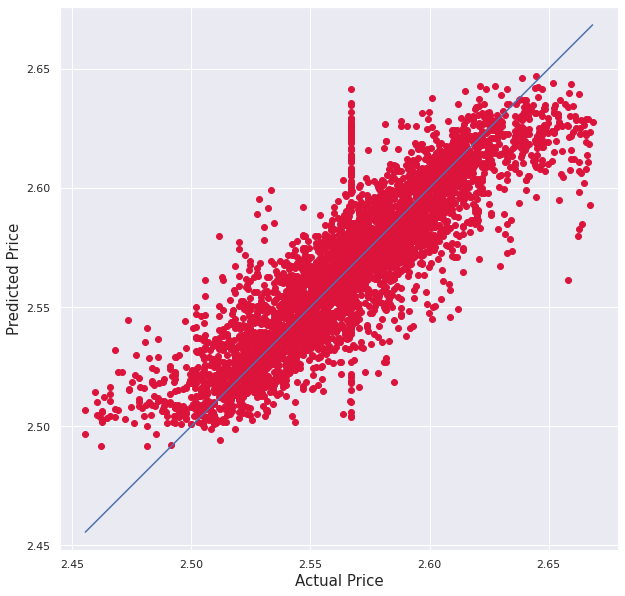

In [ ]:
clf = RandomForestRegressor(max_depth=14)
clf.fit(X_train_std, y_train)

# make predictions
expected = y_test
predicted = clf.predict(X_test_std)

#Taking Log of expected price and predicted price
expected = np.log(expected)
predicted = np.log(predicted)

#Plotting on a scatter plot
plt.figure(figsize=(10,10))
plt.scatter(expected, predicted, c='crimson')

#Setting axis min and max
p1 = max(max(predicted), max(expected))
p2 = min(min(predicted), min(expected))

#Plotting the y=x line
plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.axis('equal')

plt.show()

The most important feature to the model is Latitude, followed by grade, age, so on and so forth. Latitude might be important as homes could be closer to nicer areas, etc.

In [ ]:
#Looking at important Features
feat = pd.DataFrame(
    {"features importance": clf.feature_importances_},
    index=X.columns
)
feat.sort_values(by="features importance", ascending=False, inplace=True)
feat

,features importance
lat,0.476401
grade,0.328069
age,0.073385
bathrooms,0.053934
bedrooms,0.024385
view,0.022581
floors,0.010809
waterfront,0.006980
renovated,0.003455


####Info on columns:



*   id - Unique ID for each home sold
*   date - Date of the home sale
*   price - Price of each home sold
*   bedrooms - Number of bedrooms
*   bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
*   sqft_living - Square footage of the apartments interior living space
*   sqft_lot - Square footage of the land space
*   floors - Number of floors
*   waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
*   view - An index from 0 to 4 of how good the view of the property was
*   condition - An index from 1 to 5 on the condition of the apartment,

*   grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
*   sqft_above - The square footage of the interior housing space that is above ground level
*   sqft_basement - The square footage of the interior housing space that is below ground level
*yr_built - The year the house was initially built
*yr_renovated - The year of the house’s last renovation
*zipcode - What zipcode area the house is in
*lat - Lattitude
*long - Longitude
*sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
*sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors






